## The dataset shall be cleaned through the following process:
1. Changing misspelt column names to the correct names
2. Checking missing values
3. Checking duplicate values
4. Checking for outliers

## Datasets used:
- Transaction_Data
- Product_Offering_Data
- Customer_Feedback_Data

## Tasks:
- Handling missing, duplicated, or inconsistent values
- Standardizing formats (dates, categories, numerical fields)
- Merging or filtering datasets based on project needs

In [381]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [382]:
# Read files
customer = pd.read_csv("Customer_Feedback_Data.csv")
transactions = pd.read_csv("Transaction_Data.csv")
products = pd.read_csv("Product_Offering_Data.csv")

# Data Cleaning

In [383]:
# dataset preview
print("Customer\n")
display(customer.head())

print("\n\nTransactions")
display(transactions.head())

print("\n\nProducts")
display(products.head())

Customer



,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7




Transactions


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment




Products


,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,NaN,Medium
1,2,Gold Savings Account,Savings Account,Low,NaN,Low
2,3,High-Yield Investment Account,Investment,High,NaN,High
3,4,Mortgage Loan,Loan,Medium,NaN,High
4,5,Auto Loan,Loan,Medium,NaN,Medium


In [384]:
# determine the size of the dataframe
print("Customer:")
print(customer.shape)

print("\nTransactions:")
print(transactions.shape)

print("\nProducts:")
print(products.shape)

Customer:
(5050, 4)

Transactions:
(5050, 5)

Products:
(15, 6)


In [385]:
# how many missing values
display(customer.isnull().sum())
display(transactions.isnull().sum())
display(products.isnull().sum())

,0
Customer_ID,0
Satisfaction_Score,101
Feedback_Comments,0
Likelihood_to_Recommend,0


,0
Transaction_ID,0
Customer_ID,0
Transaction_Date,0
Transaction_Amount,100
Transaction_Type,0


,0
Product_ID,0
Product_Name,0
Product_Type,0
Risk_Level,0
Target_Age_Group,15
Target_Income_Group,0


In [386]:
# Compute the median of the Satisfaction Scores
print(customer["Satisfaction_Score"].median())

# Fill the missing Satisfaction Score values with the median
customer["Satisfaction_Score"] = customer["Satisfaction_Score"].fillna(
    customer["Satisfaction_Score"].median()
)

6.0


In [387]:
# Fill the missing Transaction Amount values with 0
transactions["Transaction_Amount"] = transactions["Transaction_Amount"].fillna(0)

# Drop the target age group since all its values are missing
products = products.drop("Target_Age_Group", axis=1)

# Display the products df with the missing target age group column
products.head()

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,Medium
1,2,Gold Savings Account,Savings Account,Low,Low
2,3,High-Yield Investment Account,Investment,High,High
3,4,Mortgage Loan,Loan,Medium,High
4,5,Auto Loan,Loan,Medium,Medium


In [388]:
# check if all missing values have been filled
display(customer.isnull().sum())
display(transactions.isnull().sum())
display(products.isnull().sum())

,0
Customer_ID,0
Satisfaction_Score,0
Feedback_Comments,0
Likelihood_to_Recommend,0


,0
Transaction_ID,0
Customer_ID,0
Transaction_Date,0
Transaction_Amount,0
Transaction_Type,0


,0
Product_ID,0
Product_Name,0
Product_Type,0
Risk_Level,0
Target_Income_Group,0


In [389]:
# how many duplicate values
print("Customer:")
print(customer.duplicated().sum())

print("\nTransactions:")
print(transactions.duplicated().sum())

print("\nProducts:")
print(products.duplicated().sum())

Customer:
83

Transactions:
50

Products:
5


In [390]:
# drop duplicate rows
customer = customer.drop_duplicates()
transactions = transactions.drop_duplicates()
products = products.drop_duplicates()

# confirm if duplicate rows have been dropped
print("Customer:")
print(customer.duplicated().sum())

print("\nTransactions:")
print(transactions.duplicated().sum())

print("\nProducts:")
print(products.duplicated().sum())

Customer:
0

Transactions:
0

Products:
0


In [391]:
# Detect Outliers in the Satisfaction Score column
# Filter rows
satisfaction_outliers = customer[(customer['Satisfaction_Score'] > 10) | (customer['Satisfaction_Score'] < 1)]

# Count and display the rows
print("Number of outlier rows:", satisfaction_outliers.shape[0])
display(satisfaction_outliers)

Number of outlier rows: 10


,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
529,530,52.0,Good service,10
573,574,60.0,Good service,9
857,858,56.0,Very satisfied,10
1090,218,60.0,Good service,1
2451,582,51.0,Good service,5
3012,926,58.0,Good service,9
3306,503,51.0,Excellent,8
4131,949,53.0,Unsatisfactory,7
4499,934,58.0,Good service,4
4650,615,54.0,Unsatisfactory,7


In [392]:
# Replace outlier values
# determine the lower and upper bounds
lower_bound = 1
upper_bound = 10

satisfaction_median = customer[(customer["Satisfaction_Score"] >= lower_bound) &
                  (customer["Satisfaction_Score"] <= upper_bound)]["Satisfaction_Score"].median()

customer["Satisfaction_Score"] = customer["Satisfaction_Score"].apply(
    lambda x: satisfaction_median if (x < lower_bound or x > upper_bound) else x
)

# Check if the outlier values have been replaced
print(customer["Satisfaction_Score"].head(10))

0    10.0
1     3.0
2    10.0
3     7.0
4     8.0
5     3.0
6     3.0
7     7.0
8    10.0
9     7.0
Name: Satisfaction_Score, dtype: float64


In [393]:
# Check if there are any more outliers
# Filter rows
satisfaction_outliers = customer[(customer['Satisfaction_Score'] > 10) | (customer['Satisfaction_Score'] < 1)]

# Count and display the rows
print("Number of outlier rows:", satisfaction_outliers.shape[0])
display(satisfaction_outliers)

Number of outlier rows: 0


,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend


In [394]:
# Standardize date format in Transaction Date column
transactions["Transaction_Date"] = pd.to_datetime(
    transactions["Transaction_Date"], errors="coerce"
)

In [395]:
# Trim whitespace from text columns
for col in customer.select_dtypes(include="object").columns:
    customer[col] = customer[col].str.strip()

for col in transactions.select_dtypes(include="object").columns:
    transactions[col] = transactions[col].str.strip()


In [396]:
# Describe the Transaction Amount column
# We keep the outliers to account for big transactions
transactions["Transaction_Amount"].describe()


,Transaction_Amount
count,5000.000000
mean,3040.009800
std,14749.854322
min,0.000000
25%,1177.750000
50%,2428.000000
75%,3682.000000
max,480300.000000


In [397]:
# Merge transaction and customer dataset
merged_df = transactions.merge(
    customer,
    on="Customer_ID",
    how="left"
)

print(merged_df.shape)
display(merged_df.head())

(24958, 8)


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,393,2023-01-01 00:00:00,3472.0,Purchase,1.0,Excellent,3
1,2,826,2023-01-01 01:00:00,0.0,Bill Payment,6.0,Needs improvement,3
2,2,826,2023-01-01 01:00:00,0.0,Bill Payment,10.0,Good service,5
3,2,826,2023-01-01 01:00:00,0.0,Bill Payment,6.0,Unsatisfactory,8
4,2,826,2023-01-01 01:00:00,0.0,Bill Payment,3.0,Unsatisfactory,4


In [398]:
# check for rows with duplicate transaction id in the merged dataset
duplicate_transactions = merged_df[merged_df.duplicated(
    subset="Transaction_ID",
    keep=False
)]

# count duplicate rows
print("Number of duplicate rows:", duplicate_transactions.shape[0])
display(duplicate_transactions.head())

Number of duplicate rows: 24874


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
1,2,826,2023-01-01 01:00:00,0.0,Bill Payment,6.0,Needs improvement,3
2,2,826,2023-01-01 01:00:00,0.0,Bill Payment,10.0,Good service,5
3,2,826,2023-01-01 01:00:00,0.0,Bill Payment,6.0,Unsatisfactory,8
4,2,826,2023-01-01 01:00:00,0.0,Bill Payment,3.0,Unsatisfactory,4
5,2,826,2023-01-01 01:00:00,0.0,Bill Payment,3.0,Very satisfied,10


In [399]:
# sort the merged dataframe by satisfaction score per transaction
merged_df = merged_df.sort_values(
    by=["Transaction_ID","Satisfaction_Score"],
    ascending=[True,False]
)

# display the merged dataframe to check if it was sorted properly
display(merged_df.head())

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,393,2023-01-01 00:00:00,3472.0,Purchase,1.0,Excellent,3
2,2,826,2023-01-01 01:00:00,0.0,Bill Payment,10.0,Good service,5
6,2,826,2023-01-01 01:00:00,0.0,Bill Payment,9.0,Needs improvement,3
1,2,826,2023-01-01 01:00:00,0.0,Bill Payment,6.0,Needs improvement,3
3,2,826,2023-01-01 01:00:00,0.0,Bill Payment,6.0,Unsatisfactory,8


In [400]:
# drop rows with duplicate transactions and keep the ones with the best satisfaction score
merged_df = merged_df.drop_duplicates(
    subset="Transaction_ID",
    keep="first"
)

# display the deduped df
print(merged_df.shape)
display(merged_df.head())

(5000, 8)


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,393,2023-01-01 00:00:00,3472.0,Purchase,1.0,Excellent,3
2,2,826,2023-01-01 01:00:00,0.0,Bill Payment,10.0,Good service,5
7,3,916,2023-01-01 02:00:00,10.0,Purchase,6.0,Needs improvement,3
16,4,109,2023-01-01 03:00:00,72.0,Investment,4.0,Good service,7
17,5,889,2023-01-01 04:00:00,1793.0,Investment,8.0,Very satisfied,3


In [401]:
# check if there are null values
merged_df.isnull().sum()

,0
Transaction_ID,0
Customer_ID,0
Transaction_Date,0
Transaction_Amount,0
Transaction_Type,0
Satisfaction_Score,0
Feedback_Comments,0
Likelihood_to_Recommend,0


In [402]:
merged_df.to_csv("FinMark_Merged.csv", index=False)
products.to_csv("Cleaned_Product_Offering_Data.csv", index=False)

# Initial Visualization

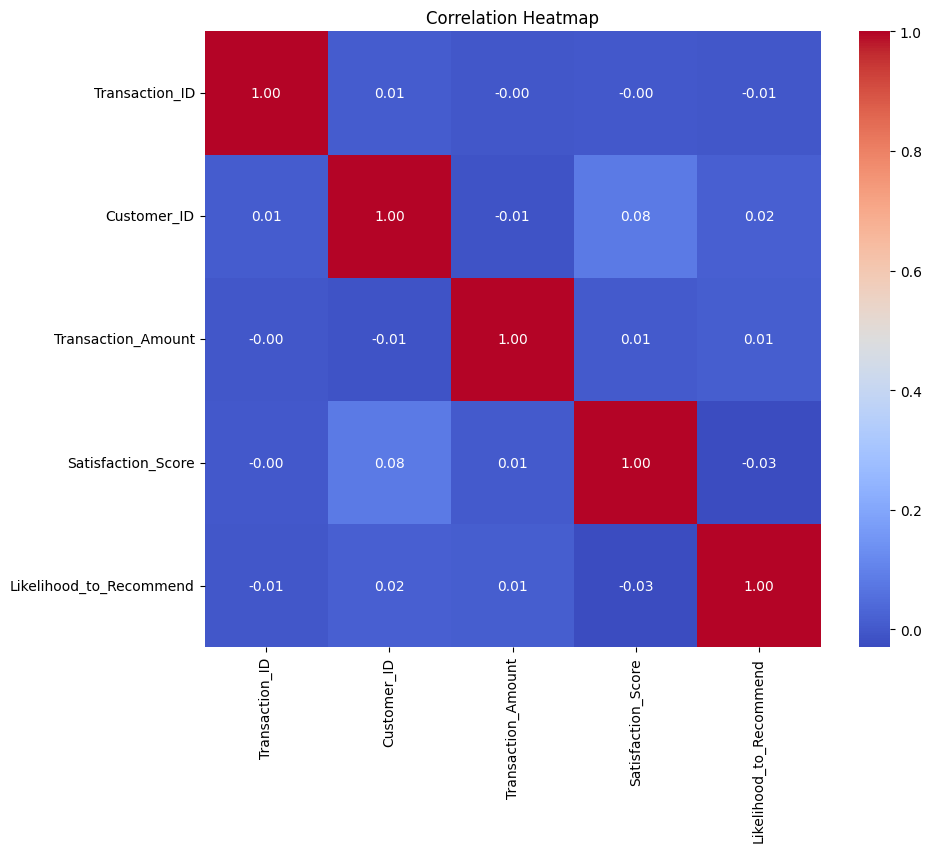

In [403]:
# Compute correlation matrix, selecting only numeric columns
numeric_cols = merged_df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation numbers
    fmt=".2f",         # format numbers to 2 decimals
    cmap="coolwarm",   # color map
    cbar=True,         # show color bar
    square=True        # square cells
)
plt.title("Correlation Heatmap")
plt.show()

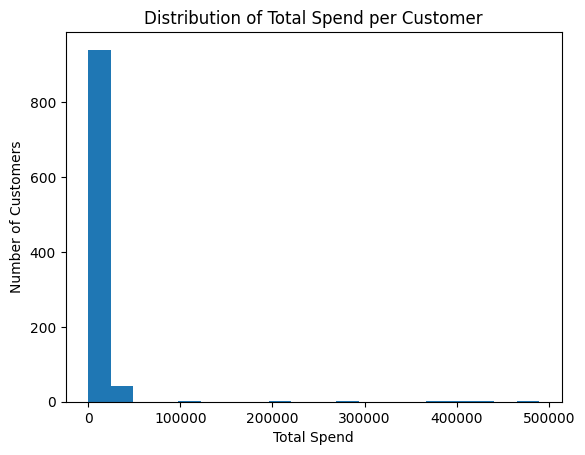

In [404]:
# compute total spend
total_spend = merged_df.groupby("Customer_ID")["Transaction_Amount"].sum()

# plot chart
plt.hist(total_spend, bins=20)
plt.title("Distribution of Total Spend per Customer")
plt.xlabel("Total Spend")
plt.ylabel("Number of Customers")
plt.show()

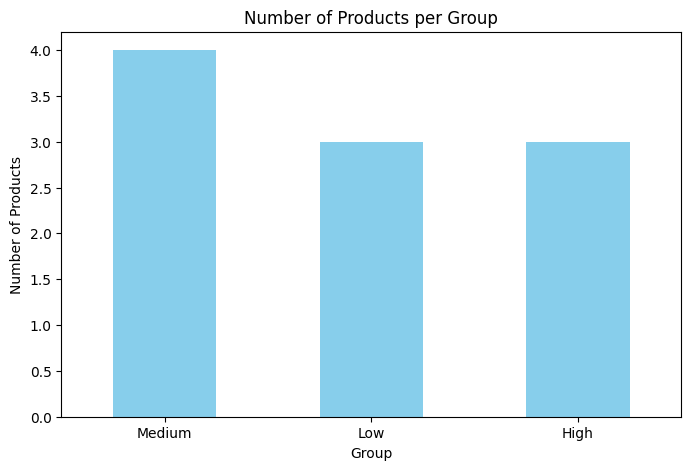

In [405]:
# Count how many products are in each group
group_counts = products['Target_Income_Group'].value_counts()

# Plot
plt.figure(figsize=(8,5))
group_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Products per Group")
plt.xlabel("Group")
plt.ylabel("Number of Products")
plt.xticks(rotation=0)
plt.show()

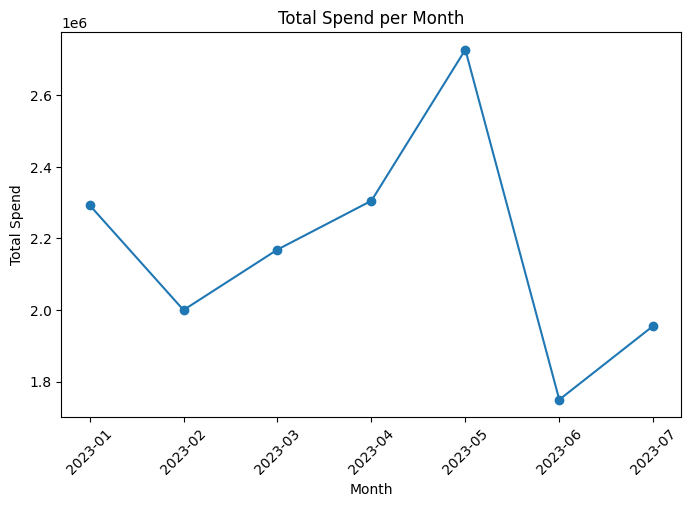

In [406]:
# Extract month from the date
merged_df['month'] = merged_df['Transaction_Date'].dt.to_period('M')

# group by month
monthly_spend = merged_df.groupby('month')['Transaction_Amount'].sum()

# plot chart
plt.figure(figsize=(8,5))
plt.plot(monthly_spend.index.astype(str), monthly_spend.values, marker='o')
plt.title("Total Spend per Month")
plt.xlabel("Month")
plt.ylabel("Total Spend")
plt.xticks(rotation=45)
plt.show()

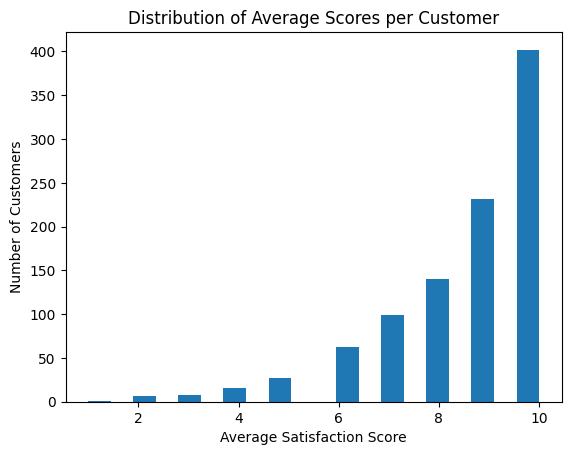

In [407]:
# plot chart on average satisfaction scores per customer
plt.hist(mean_score, bins=20)
plt.title("Distribution of Average Scores per Customer")
plt.xlabel("Average Satisfaction Score")
plt.ylabel("Number of Customers")
plt.show()

/tmp/ipython-input-2800185345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


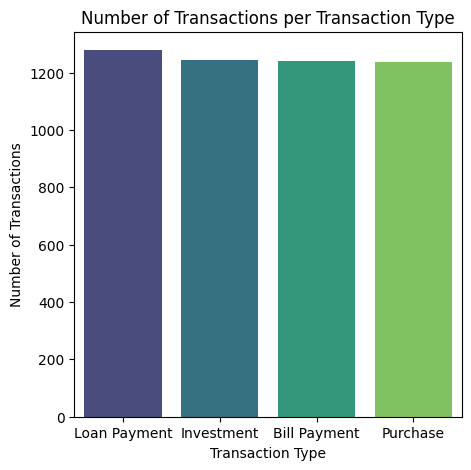

In [408]:
# compute number of transactions per type
transaction_counts = final_merge["Transaction_Type"].value_counts()

# plot chart
plt.figure(figsize=(5,5))
sns.barplot(
    x=transaction_counts.index,
    y=transaction_counts.values,
    palette="viridis"
)
plt.title("Number of Transactions per Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.show()

# Feature Engineering

In [409]:
# display merged_df
display(merged_df.head())

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend,month
0,1,393,2023-01-01 00:00:00,3472.0,Purchase,1.0,Excellent,3,2023-01
2,2,826,2023-01-01 01:00:00,0.0,Bill Payment,10.0,Good service,5,2023-01
7,3,916,2023-01-01 02:00:00,10.0,Purchase,6.0,Needs improvement,3,2023-01
16,4,109,2023-01-01 03:00:00,72.0,Investment,4.0,Good service,7,2023-01
17,5,889,2023-01-01 04:00:00,1793.0,Investment,8.0,Very satisfied,3,2023-01


In [410]:
# build a customer summary table
customer_summary = merged_df.groupby("Customer_ID").agg(
    Total_Spend=("Transaction_Amount", "sum"),
    Avg_Transaction_Value=("Transaction_Amount", "mean"),
    Transaction_Count=("Transaction_Amount", "count")
).reset_index()

display(customer_summary.head())

,Customer_ID,Total_Spend,Avg_Transaction_Value,Transaction_Count
0,1,16836.0,2806.0,6
1,2,4907.0,2453.5,2
2,3,1538.0,1538.0,1
3,4,8295.0,4147.5,2
4,5,14798.0,2959.6,5


In [411]:
# merge the customer_summary with the merged_df
final_df = merged_df.merge(
    customer_summary,
    on="Customer_ID",
    how="left"
)

In [412]:
# Sort transactions per month
final_df = final_df.sort_values("month")

# Compute months since last transaction per company
final_df["months_since_last_transaction"] = (
    final_df.groupby("Customer_ID")["month"]
    .diff()
    .fillna(0)
    .apply(lambda x: x.n if x != 0 else 0)
)

    # Fill NaN for the first transaction with 0 or some default
final_df["months_since_last_transaction"] = final_df["months_since_last_transaction"].fillna(0)

# Display
display(final_df)

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend,month,Total_Spend,Avg_Transaction_Value,Transaction_Count,months_since_last_transaction
48,49,234,2023-01-03 00:00:00,1926.0,Investment,5.0,Needs improvement,10,2023-01,13926.0,2321.000000,6,0
49,50,141,2023-01-03 01:00:00,3422.0,Purchase,8.0,Unsatisfactory,10,2023-01,11646.0,2911.500000,4,0
50,51,708,2023-01-03 02:00:00,2509.0,Loan Payment,8.0,Very satisfied,7,2023-01,6181.0,2060.333333,3,0
51,52,498,2023-01-03 03:00:00,3450.0,Investment,9.0,Good service,3,2023-01,18333.0,3055.500000,6,0
52,53,555,2023-01-03 04:00:00,3555.0,Loan Payment,10.0,Very satisfied,5,2023-01,15942.0,2657.000000,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,4356,751,2023-07-01 11:00:00,3098.0,Purchase,10.0,Unsatisfactory,10,2023-07,16618.0,2769.666667,6,3
4356,4357,362,2023-07-01 12:00:00,278.0,Investment,10.0,Good service,1,2023-07,1884.0,628.000000,3,5
4357,4358,482,2023-07-01 13:00:00,870.0,Investment,9.0,Needs improvement,2,2023-07,5837.0,2918.500000,2,1
4358,4359,244,2023-07-01 14:00:00,491.0,Investment,7.0,Unsatisfactory,6,2023-07,25356.0,2535.600000,10,0


In [413]:
# describe the final_df
display (final_df.shape)
print("---")
display(final_df.info())

(5000, 13)

---
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 48 to 4359
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Transaction_ID                 5000 non-null   int64         
 1   Customer_ID                    5000 non-null   int64         
 2   Transaction_Date               5000 non-null   datetime64[ns]
 3   Transaction_Amount             5000 non-null   float64       
 4   Transaction_Type               5000 non-null   object        
 5   Satisfaction_Score             5000 non-null   float64       
 6   Feedback_Comments              5000 non-null   object        
 7   Likelihood_to_Recommend        5000 non-null   int64         
 8   month                          5000 non-null   period[M]     
 9   Total_Spend                    5000 non-null   float64       
 10  Avg_Transaction_Value          5000 non-null   float64       
 11  Transaction_Count

None

# Feature Transformation

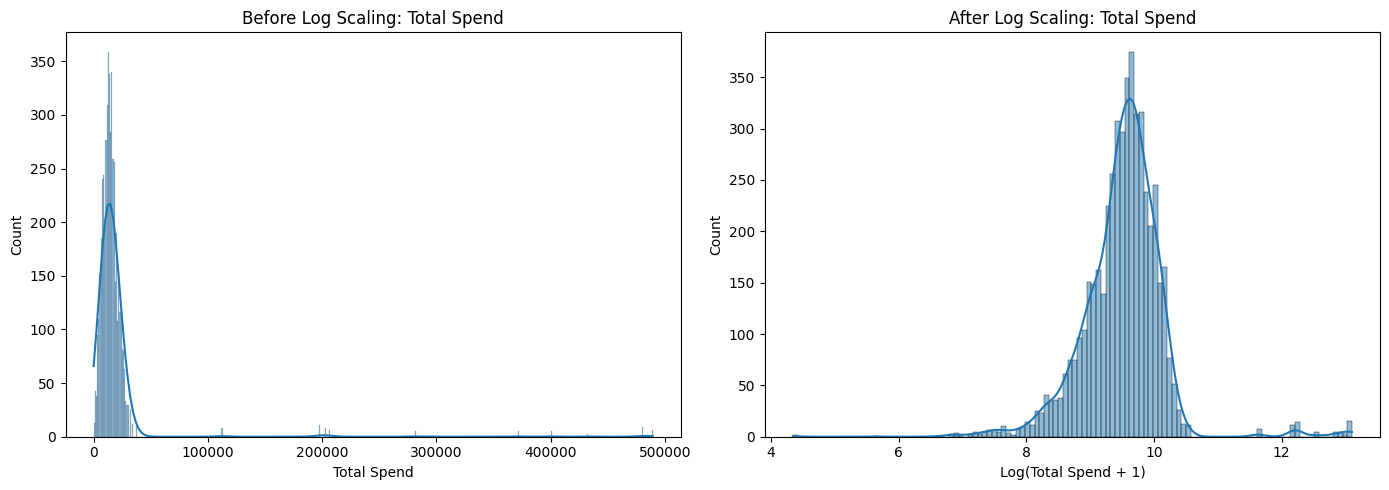

In [414]:
# Log scaling for total spend (safe for zeros)
final_df["total_spend_log"] = np.log1p(final_df["Total_Spend"])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before
sns.histplot(final_df["Total_Spend"], kde=True, ax=axes[0])
axes[0].set_title("Before Log Scaling: Total Spend")
axes[0].set_xlabel("Total Spend")

# After
sns.histplot(final_df["total_spend_log"], kde=True, ax=axes[1])
axes[1].set_title("After Log Scaling: Total Spend")
axes[1].set_xlabel("Log(Total Spend + 1)")

plt.tight_layout()
plt.show()


# Re-EDA

In [415]:
# display final_df
display(final_df.head())

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend,month,Total_Spend,Avg_Transaction_Value,Transaction_Count,months_since_last_transaction,total_spend_log
48,49,234,2023-01-03 00:00:00,1926.0,Investment,5.0,Needs improvement,10,2023-01,13926.0,2321.000000,6,0,9.541585
49,50,141,2023-01-03 01:00:00,3422.0,Purchase,8.0,Unsatisfactory,10,2023-01,11646.0,2911.500000,4,0,9.362804
50,51,708,2023-01-03 02:00:00,2509.0,Loan Payment,8.0,Very satisfied,7,2023-01,6181.0,2060.333333,3,0,8.729397
51,52,498,2023-01-03 03:00:00,3450.0,Investment,9.0,Good service,3,2023-01,18333.0,3055.500000,6,0,9.816513
52,53,555,2023-01-03 04:00:00,3555.0,Loan Payment,10.0,Very satisfied,5,2023-01,15942.0,2657.000000,6,0,9.676775


In [416]:
# check for missing values
final_df.isnull().sum()

,0
Transaction_ID,0
Customer_ID,0
Transaction_Date,0
Transaction_Amount,0
Transaction_Type,0
Satisfaction_Score,0
Feedback_Comments,0
Likelihood_to_Recommend,0
month,0
Total_Spend,0


In [417]:
# check for duplicate transactions
final_df.duplicated(subset="Transaction_ID").sum()

np.int64(0)

In [418]:
# All good! Convert to csv
final_df.to_csv("FinMark_Final.csv", index=False)

# Final Visualization

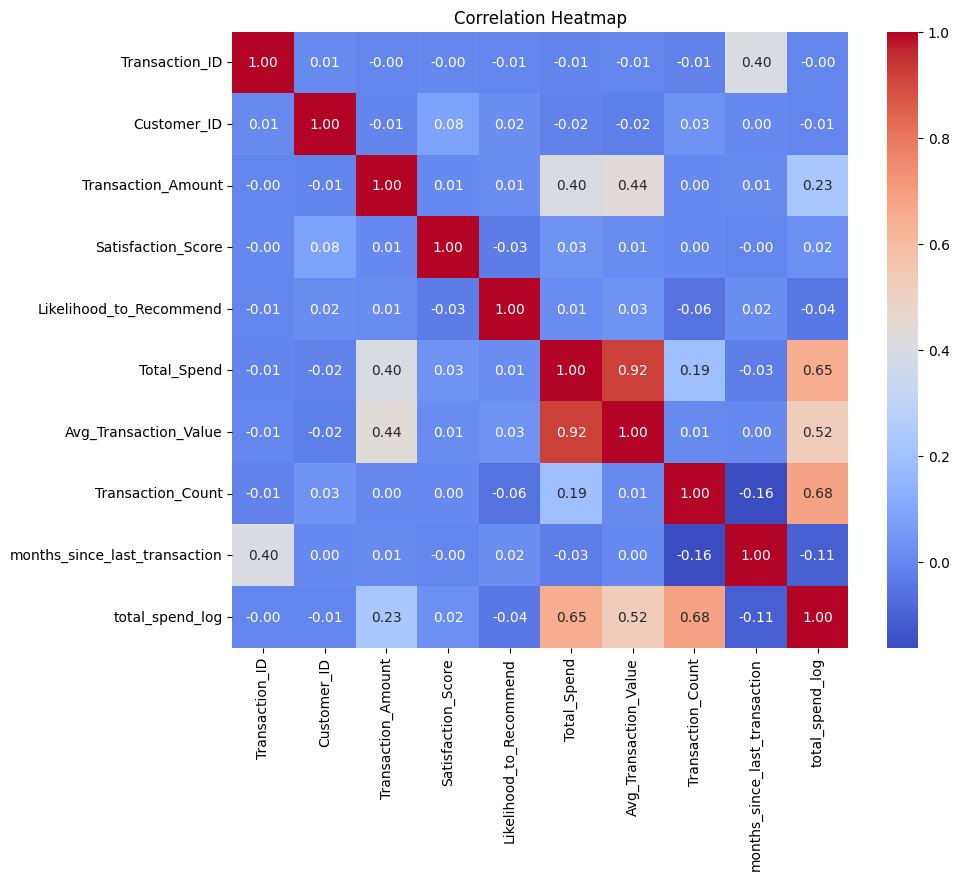

In [419]:
# Compute correlation matrix, selecting only numeric columns
numeric_cols = final_df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation numbers
    fmt=".2f",         # format numbers to 2 decimals
    cmap="coolwarm",   # color map
    cbar=True,         # show color bar
    square=True        # square cells
)
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-1866886126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_distribution.index, y=customer_distribution.values, palette='pastel')


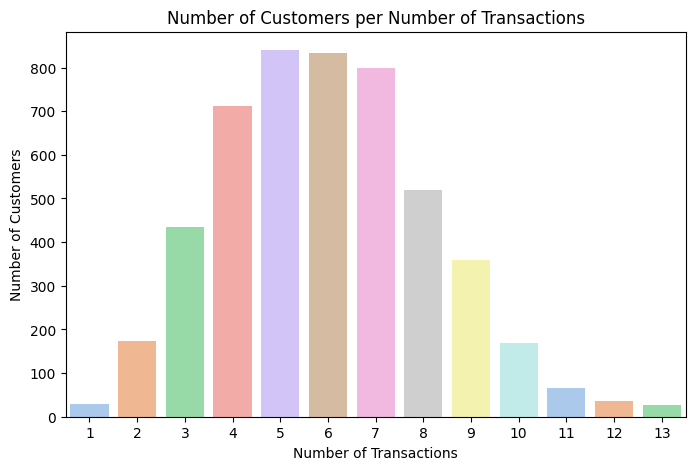

In [420]:
# compute customer distribution
customer_distribution = final_df['Transaction_Count'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=customer_distribution.index, y=customer_distribution.values, palette='pastel')
plt.title("Number of Customers per Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.show()

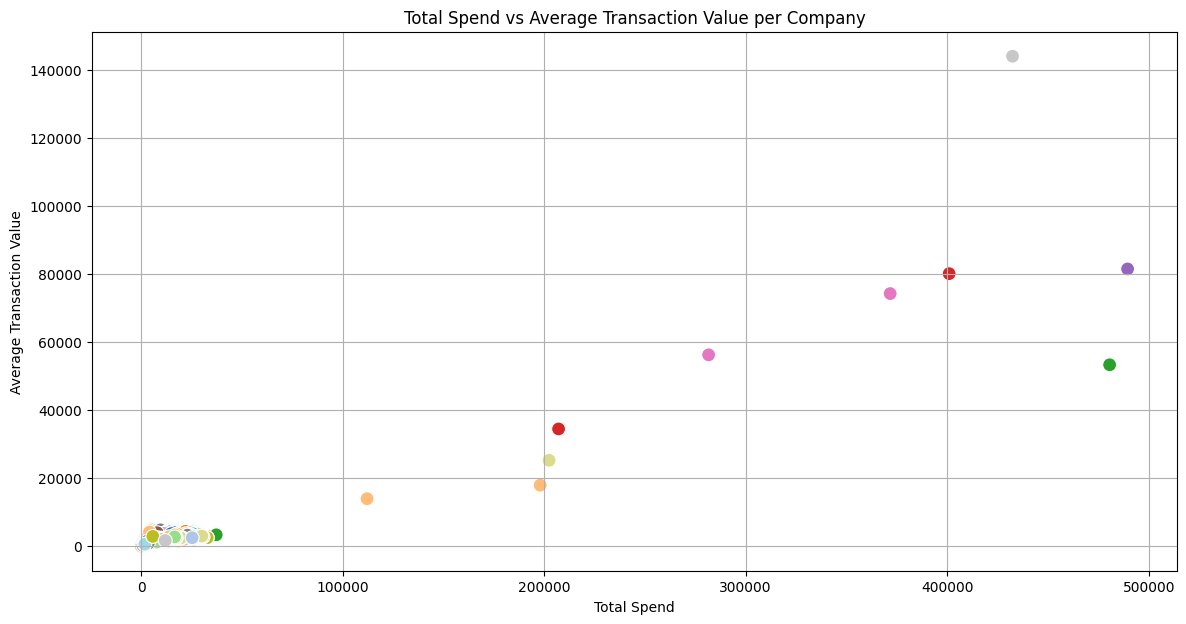

In [421]:
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=final_df,
    x="Total_Spend",
    y="Avg_Transaction_Value",
    hue="Customer_ID",       # color each company differently
    palette="tab20",        # up to 20 distinct colors
    s=100,
    legend=False            # hide legend if too many companies
)

plt.title("Total Spend vs Average Transaction Value per Company")
plt.xlabel("Total Spend")
plt.ylabel("Average Transaction Value")
plt.grid(True)
plt.show()

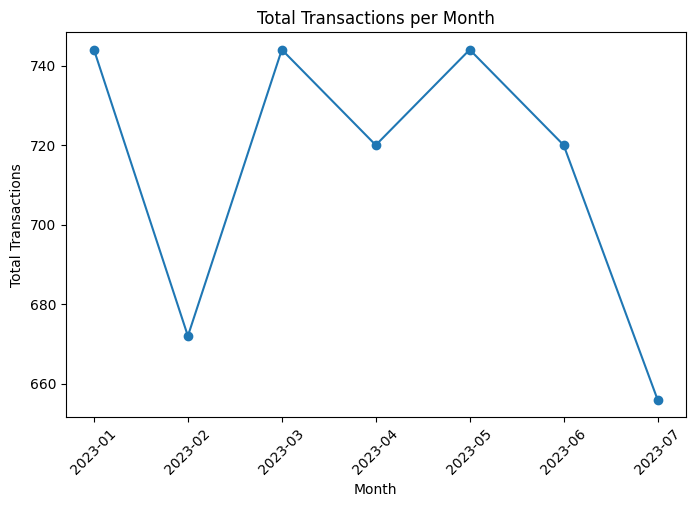

In [422]:
# group by month
monthly_spend = merged_df.groupby('month')['Transaction_ID'].count()

# plot chart
plt.figure(figsize=(8,5))
plt.plot(monthly_spend.index.astype(str), monthly_spend.values, marker='o')
plt.title("Total Transactions per Month")
plt.xlabel("Month")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.show()